In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Jan 23 21:20:24 2020

@author: Clayton Fields
completed for fulfillment of Homework 02 for Math 572 at 
Boise State University
"""
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad



Problem 01: From example 2.2 on page 27 of Computational Statistics

k          x
1         3.4177980946159363
2         3.574045197454971
3         3.590946123623657
4         3.5911214580612825


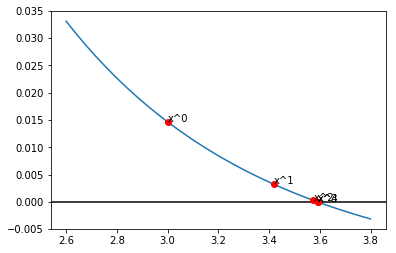

In [2]:
def h(x):
    return ((x+1)*(1 + 1/x - np.log(x)))/(3 +4/x + 1/x**2 - 2*np.log(x))

def gprime(x):
    return (1 + 1/x - np.log(x))/(1+x)**2

#def tangent(x):



x = 3
xhist = [x]
k=0
print("k          x")
#Implement Newton's Method
while(h(x) > .000001):
    x = x + h(x)
    xhist.append(x)
    k+=1
    print(k,"       ",x)
    
  
domain = np.linspace(2.6,3.8,100)
plt.plot(domain,gprime(domain))
plt.axhline(y=0,color='black',)
for i in range(len(xhist)):
    
    plt.plot(xhist[i],gprime(xhist[i]),'ro')
    plt.annotate('x^%d'%(i),(xhist[i],gprime(xhist[i])))


#plt.xlim(2.6,4.0)
#plt.ylim(-.02,.03)
    


Problem 02:  From problem 2.2 on page 44 of Computatoinal Statistics


Part C
Sarting value =  0.058441
Iterations:  3
The MLE for  0.058441  is  -0.011972002283305671

Sarting value =  -2.7
Iterations:  3
The MLE for  -2.7  is  -2.6666999271295544

Sarting value =  2.7
Iterations:  4
The MLE for  2.7  is  2.8730945490395636

Part D:
The following table prints the sets of attraction for our 19 unqique solutions.

        MLE   lowest x0   highest x0    range
1   -3.093     -3.1416      -2.8259   0.316
2  -2.7862     -2.7943      -2.7627   0.032
3  -2.6667     -2.7311      -2.6048   0.126
4  -2.5076     -2.5733      -2.4154   0.158
5  -2.3882     -2.3838      -2.3838   0.000
6  -2.2973     -2.3522      -2.2575   0.095
7  -2.2322     -2.2260      -2.2260   0.000
8  -1.6583     -2.1944      -1.4682   0.726
9  -1.4475     -1.4366      -1.4366   0.000
10  -0.9533     -1.4050      -0.8367   0.568
11  -0.0120     -0.8051      0.4894   1.295
12  0.7906     0.5210      1.9418   1.421
13  2.0036     1.9734      2.1944   0.221
14  2.2362     2.2260      2.2575   0.

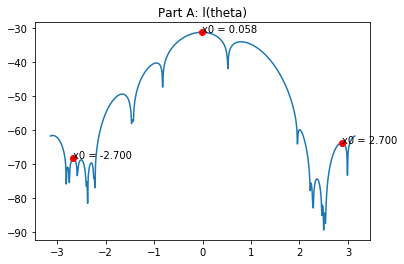

In [3]:
def loglike(theta,x):
    n = x.size
#    print([np.log(1-np.cos(x[i]-theta)) for i in range(n)])
    logsum = np.asarray([np.log(1-np.cos(x[i]-theta)) for i in range(n)]).sum(axis=0) + -n*np.log(2*np.pi)
    
    return logsum

def lprime(theta,x):
    return (1./np.tan((theta-x)*.5)).sum()

def l2prime(theta,x):
    return -.5*(1./np.sin((theta-x)*.5)**2).sum()

def h(theta,x):
    return lprime(theta,x)/l2prime(theta,x)
    


#Given sample from distribution
sample = np.asarray([3.91,4.85,2.28,4.06,3.70,4.04,5.46,3.53,2.28,1.96,2.53,3.88,\
          2.22,3.47,4.82,2.46,2.99,2.54,0.52,2.50])
#Sample Mean
xbar = sample.mean()


#Method of moments estimate solved analytically
#\mu(x) = E(x) = integral(x*(1-cos(x-\theta)),0,2*pi) = 
#sin(\theta) + pi = x_bar = 3.2
#\theta = .058441
mome = .058441
  


domain = np.linspace(-1*np.pi,np.pi,500)
plt.figure()
plt.plot(domain,loglike(domain,sample))
plt.title('Part A: l(theta)')
theta=0
    
print()
print("Part C")
#plt.plot(domain,loglike(domain,sample))
starting = [mome,-2.7,2.7]  
for start in starting:
    iteration = 0
    theta = start
    #Implement Newton's method
    while np.abs(h(theta,sample)) > .000001:
        theta = theta - h(theta,sample)
        iteration+=1
    print('Sarting value = ',start)
    print('Iterations: ',iteration)
    print('The MLE for ',start,' is ',theta)
    print()
    plt.plot(theta,loglike(theta,sample),'ro')
    plt.annotate('x0 = %1.3f'%start,(theta,loglike(theta,sample)))


#Part D: Sets of attraction
starts = np.linspace(-np.pi,np.pi,200)
thetas=[]
for start in starts:
    theta=start 
    #Implement Newton's method    
    while np.abs(h(theta,sample))>.000001:
        theta = theta - h(theta,sample)
    thetas.append(theta)

rounded=np.around(thetas,decimals=4)
unique,idx = np.unique(rounded,return_index=True)
    
#print the the ranges for the unique values of theta from various x0's
print("Part D:")
print('The following table prints the sets of attraction for our 19 unqique solutions.')
print()
print('        MLE   lowest x0   highest x0    range')
print('1   %.3f     %.4f      %.4f   %.3f' %(thetas[0], starts[idx[0]],\
                                             starts[idx[1]-1],abs(starts[idx[0]]-starts[idx[1]-1])) )
for i in range(1,len(unique)-1):
    print('%d  %.4f     %.4f      %.4f   %.3f' %(i+1,unique[i], starts[idx[i]],\
                                                 starts[idx[i+1]-1],abs(starts[idx[i]]-starts[idx[i+1]-1])))
print('19   %.4f     %.4f      %.4f   %.3f' %(unique[18], starts[idx[18]], starts[199],abs(starts[idx[18]]-starts[199])))
print()
print("Note that groups 11 and 12 have the widest range of values converging to them." )
print("The MLE estimate from our method of moments x0 is group 11.")

#Part E:
starts = np.linspace(-np.pi,np.pi,1000)
thetas=[]
for start in starts:
    theta=start 
    #Implement Newton's method    
    while np.abs(h(theta,sample))>.000001:
        theta = theta - h(theta,sample)
    thetas.append(theta)

    starts = np.linspace(-np.pi,np.pi,100000)
thetas=[]
for start in starts:
    theta=start 
    #Implement Newton's method    
    while np.abs(h(theta,sample))>.000001:
        theta = theta - h(theta,sample)
    thetas.append(theta)

rounded=np.around(thetas,decimals=4)
unique,idx = np.unique(rounded,return_index=True)
print()
print("Part E:")
#print('The following table prints the sets of attraction for our 19 unqique solutions.')
#print()
#print('        MLE   lowest x0   highest x0    range')
#print('1   %.3f     %.6f      %.4f   %.3f' %(thetas[0], starts[idx[0]],\
#                                             starts[idx[1]-1],abs(starts[idx[0]]-starts[idx[1]-1])) )
#for i in range(1,len(unique)-1):
#    print('%d  %.4f     %.6f      %.6f   %.3f' %(i+1,unique[i], starts[idx[i]],\
#                                                 starts[idx[i+1]-1],abs(starts[idx[i]]-starts[idx[i+1]-1])))
#print('19   %.4f     %.4f      %.4f   %.3f' %(unique[18], starts[idx[18]], starts[199],abs(starts[idx[18]]-starts[199])))
print()
print("After running the sets of attraction loop with 100000 values we find that:" )
print("The difference between the boundaries of group 5 and 6 is .000063.")
print("This is the smallest difference I could find between starting values")
print("that yielded a different estiamate for theta.")